In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/Users/charlottefelius/documents/wids2022/WIDS/data/train.csv")
sub = pd.read_csv("/Users/charlottefelius/documents/wids2022/WIDS/data/test.csv")

In [3]:
data.head(2)
sub.head(2)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758


In [5]:
print("Amount of rows and cols respectively (testset)")
print(str(len(sub)) + ", " + str(len(sub.columns)) + "\n")
print("Column names:")
print([i.strip("\n") for i in sub.columns])
print()
# print("Missing data:")
# print(data.describe())

Amount of rows and cols respectively (testset)
9705, 63

Column names:
['Year_Factor', 'State_Factor', 'building_class', 'facility_type', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 

In [6]:
print("Amount of rows and cols respectively")
print(str(len(data)) + ", " + str(len(data.columns)) + "\n")
print("Column names:")
print([i.strip("\n") for i in data.columns])
print()
# print("Missing data:")
# print(data.describe())

Amount of rows and cols respectively
75757, 64

Column names:
['Year_Factor', 'State_Factor', 'building_class', 'facility_type', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp

#### Missing data entries

In [9]:
def missing_data(dataframe):
    
    """
    
    Method for calculating missing data
    input: dataframe
    output: sorted list (descending) with colname, #missing values and percentage of total values
    
    """
    
    length = len(dataframe)
    missing = []
    
    for column in dataframe.columns:
        difference = length - dataframe[column].count()
        
        if difference > 0:
            missing.append((column, difference, str('{0:.2f}'.format(difference/length*100)) +"%"))
    
    missing.sort(key = lambda x: x[1], reverse=True)
    
    return missing
        
result = missing_data(data)
result2 = missing_data(sub)

for i in result:
    print(i)

print()
print("Missing values testset:")

for i in result2:
    print(i)

('days_with_fog', 45796, '60.45%')
('direction_peak_wind_speed', 41811, '55.19%')
('direction_max_wind_speed', 41082, '54.23%')
('max_wind_speed', 41082, '54.23%')
('energy_star_rating', 26709, '35.26%')
('year_built', 1837, '2.42%')

Missing values testset:
('days_with_fog', 9117, '93.94%')
('direction_max_wind_speed', 8575, '88.36%')
('direction_peak_wind_speed', 8575, '88.36%')
('max_wind_speed', 8575, '88.36%')
('energy_star_rating', 2254, '23.23%')
('year_built', 92, '0.95%')


In [10]:
# year built probably missing if built a long time ago, hence impute with some things.
# delete everything with higher then 50 percent missing stuff


In [11]:
#### Data types
data.dtypes

Year_Factor                    int64
State_Factor                  object
building_class                object
facility_type                 object
floor_area                   float64
                              ...   
direction_peak_wind_speed    float64
max_wind_speed               float64
days_with_fog                float64
site_eui                     float64
id                             int64
Length: 64, dtype: object

In [12]:
for i, j in data.dtypes.iteritems():
    print(i, j)

Year_Factor int64
State_Factor object
building_class object
facility_type object
floor_area float64
year_built float64
energy_star_rating float64
ELEVATION float64
january_min_temp int64
january_avg_temp float64
january_max_temp int64
february_min_temp int64
february_avg_temp float64
february_max_temp int64
march_min_temp int64
march_avg_temp float64
march_max_temp int64
april_min_temp int64
april_avg_temp float64
april_max_temp int64
may_min_temp int64
may_avg_temp float64
may_max_temp int64
june_min_temp int64
june_avg_temp float64
june_max_temp int64
july_min_temp int64
july_avg_temp float64
july_max_temp int64
august_min_temp int64
august_avg_temp float64
august_max_temp int64
september_min_temp int64
september_avg_temp float64
september_max_temp int64
october_min_temp int64
october_avg_temp float64
october_max_temp int64
november_min_temp int64
november_avg_temp float64
november_max_temp int64
december_min_temp int64
december_avg_temp float64
december_max_temp int64
cooling_degree

In [ ]:
# State_Factor object
# building_class object
# facility_type object
objecttypes = ["State_Factor", "building_class", "facility_type", "Year_Factor", "year_built", "energy_star_rating"]

for col in objecttypes:
    print(col)
    print(data[col].unique())
    print()

#### Distribution of values

In [14]:
def distribution_plots(dataframe):
    
    """
    
    input: dataframe
    output: plots with distribution of each column
    
    """
    
    for column in dataframe.columns:
        plt.hist(data[column], bins = 35)
        plt.title(column)
        plt.show()

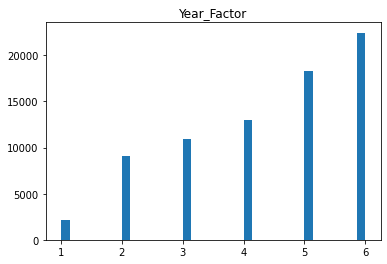

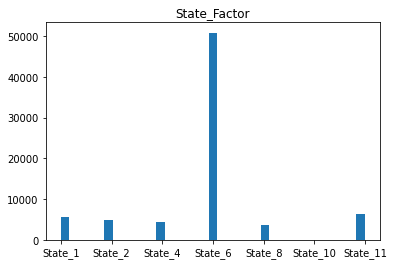

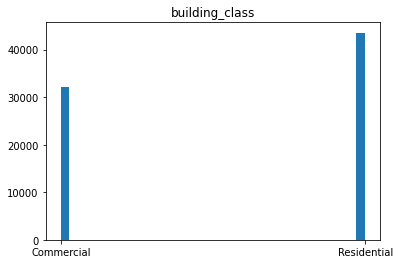

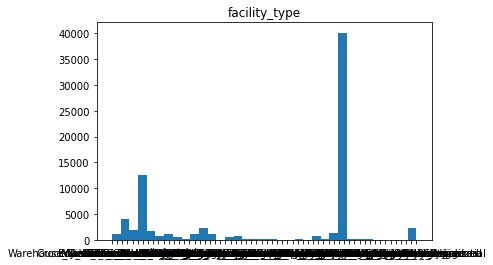

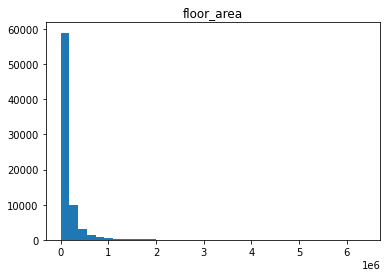

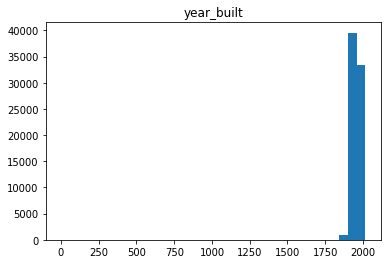

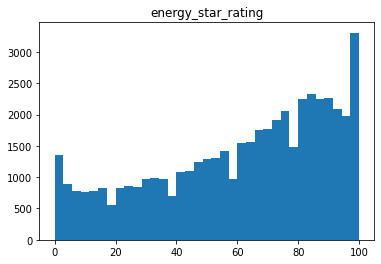

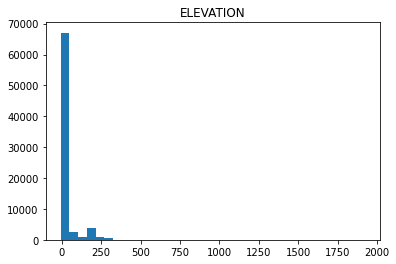

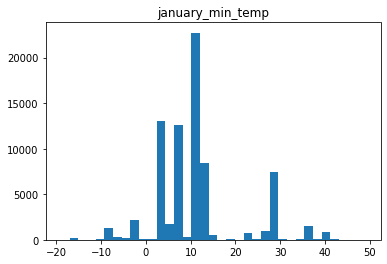

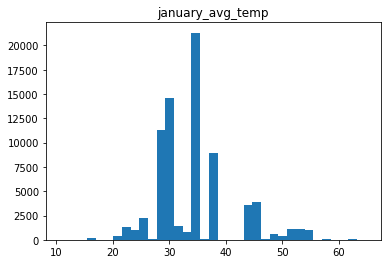

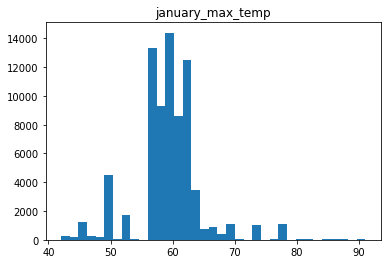

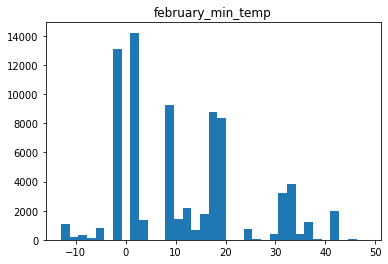

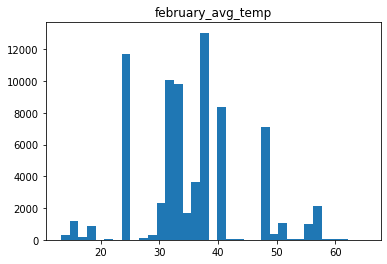

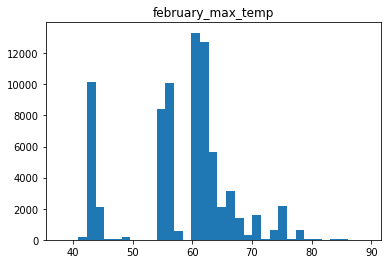

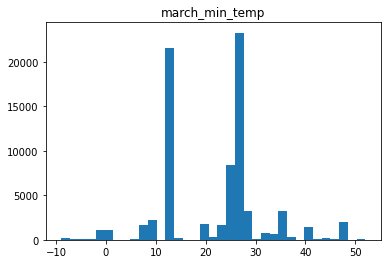

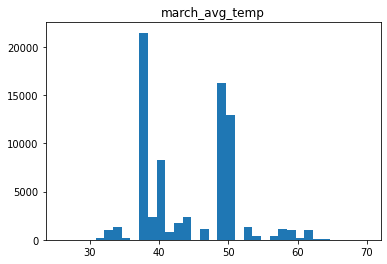

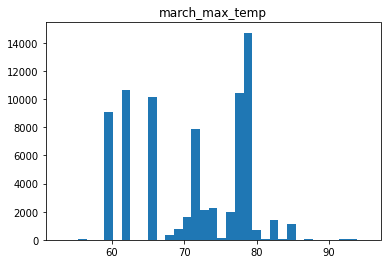

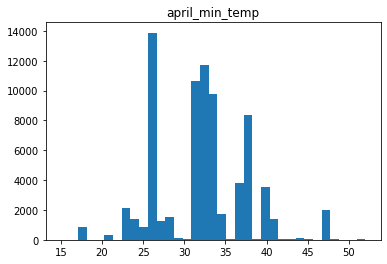

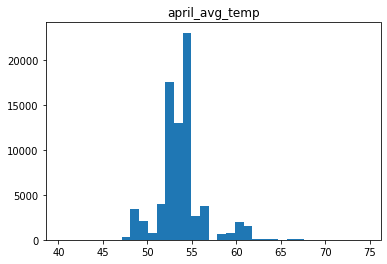

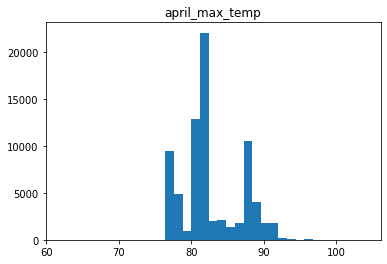

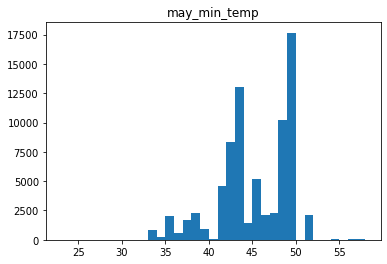

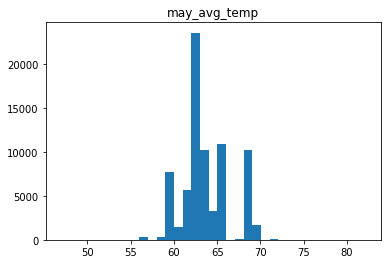

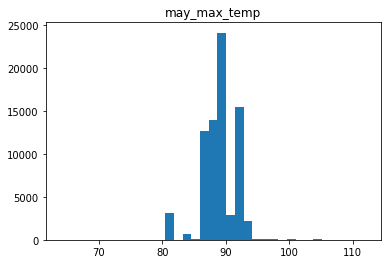

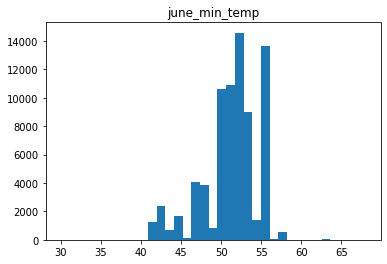

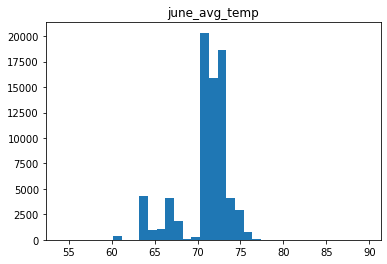

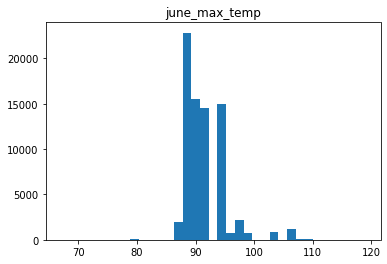

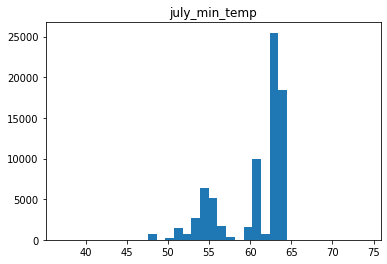

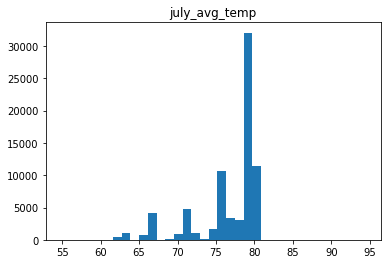

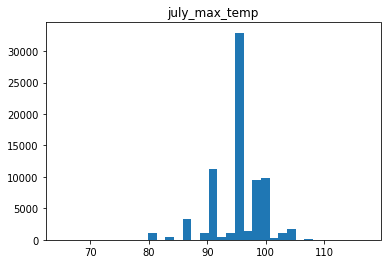

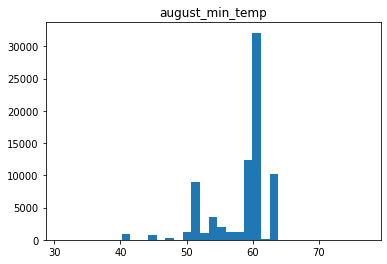

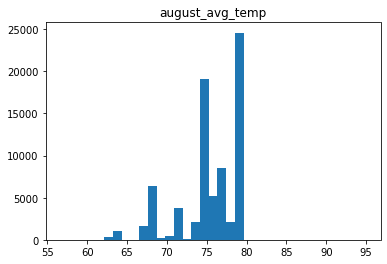

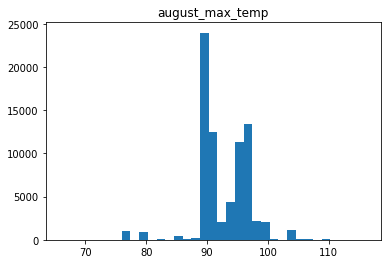

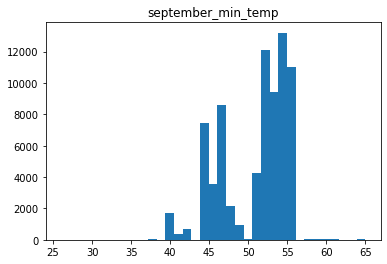

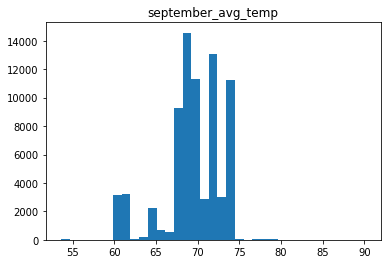

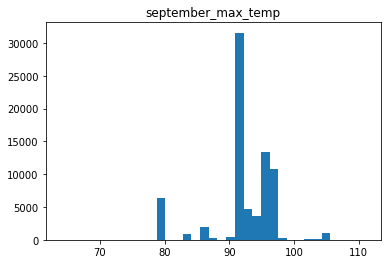

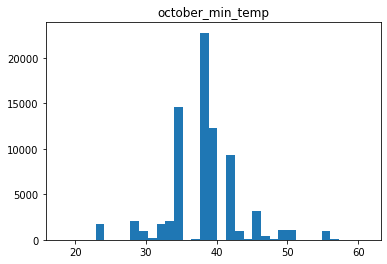

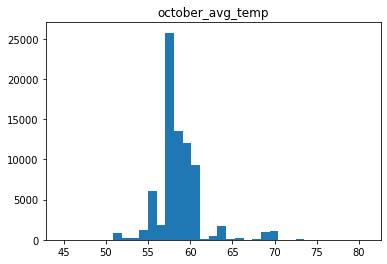

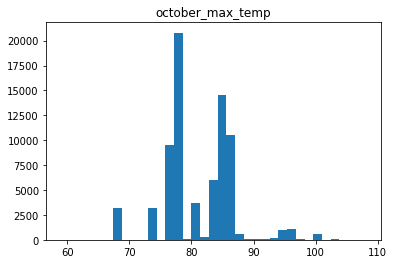

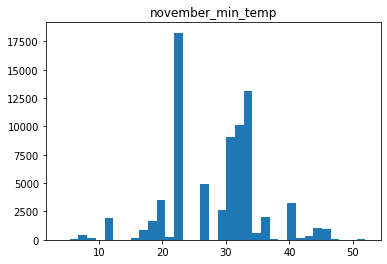

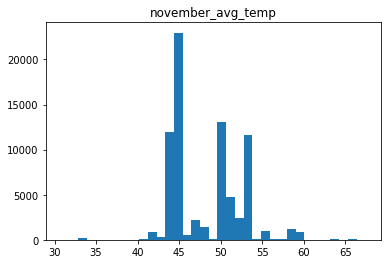

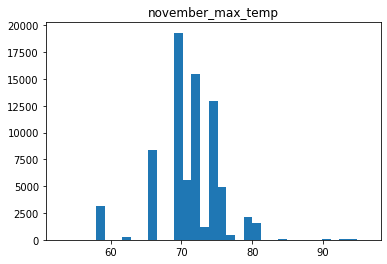

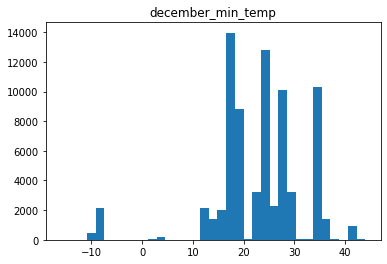

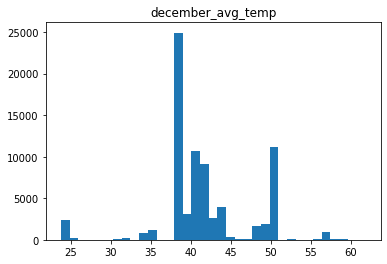

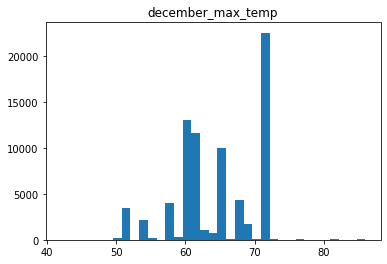

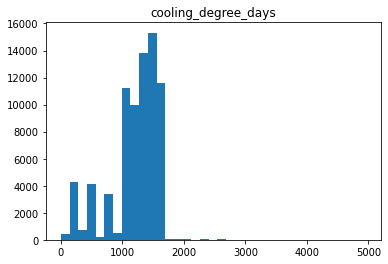

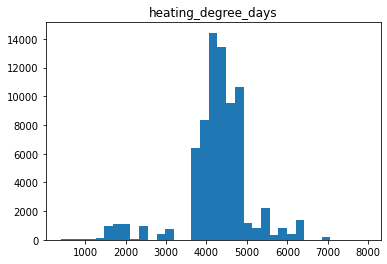

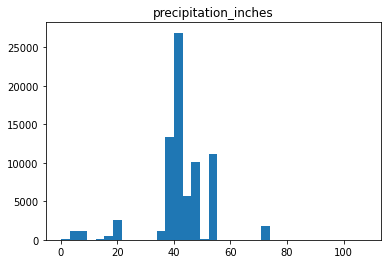

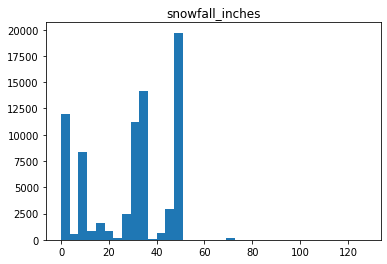

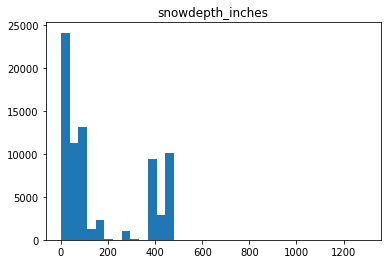

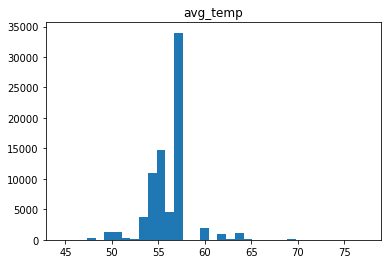

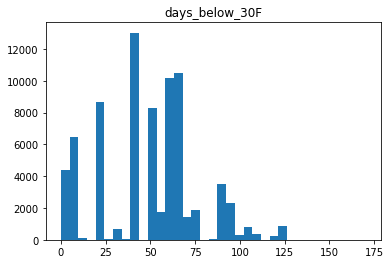

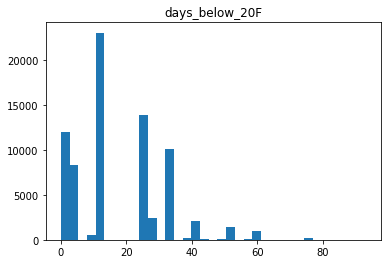

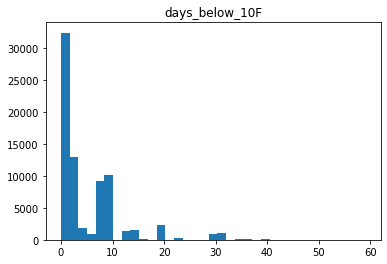

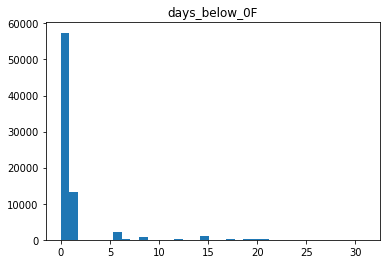

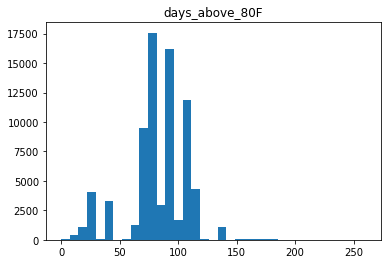

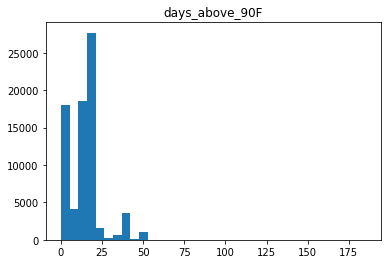

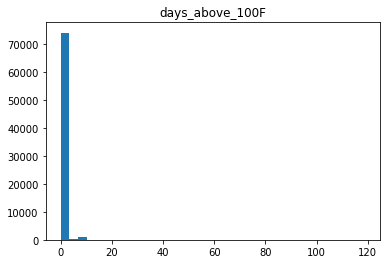

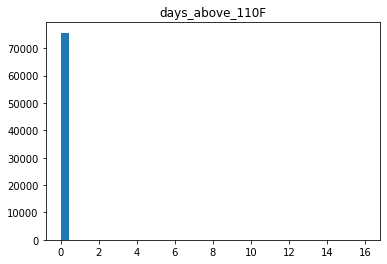

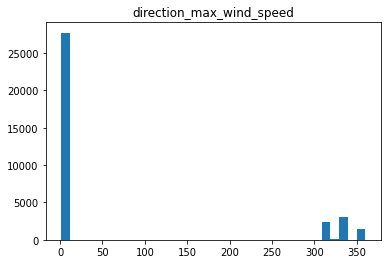

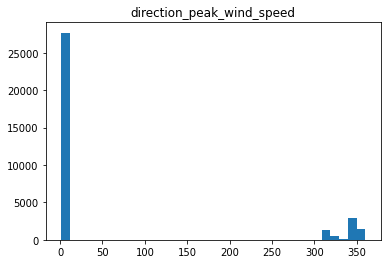

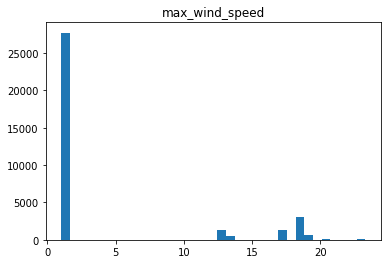

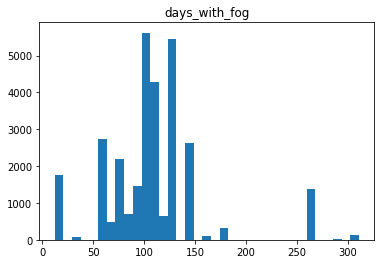

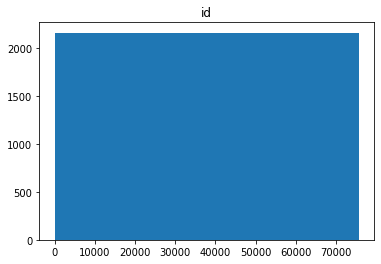

In [15]:
distribution_plots(sub)

#### Heatmap (correlations of columns)

In [ ]:
sns.heatmap(data.corr())

In [ ]:
for i, j in data.corr()["year_built"].iteritems():
    if abs(j) > 0.1:
        print(i, j)

In [ ]:
def check_correlation(dataframe,colname, min_corr = 0.1):
    
    """
    
    Checks the correlations from a column with all other columns
    input: column name -> string, min_corr -> float
    output: Ordered list with correlations
    
    """
    
    print(f"Correlations of '{colname}':")
    
    correlations = []

    for i, j in dataframe.corr()[colname].iteritems():
        if abs(j) > min_corr:
            correlations.append((i, abs(j)))

    correlations.sort(key = lambda x: x[1], reverse=True)
    
    return correlations

for i in check_correlation(data, "site_eui", 0):
    print(i)

### Quick Findings

Based on above analysis, we try the following *as a starting point*.

> #### Delete the following columns
> - days_with_fog
> - direction_peak_wind_speed
> - direction_max_wind_speed
> - max_wind_speed
> - year_built
> - days_above_90F
> - days_above_110F
> - facility_type

> #### Impute missing values for energy_star_rating and year_built
> Imputing is done by taking the median

First tries are just a random forest model and xgboost.

#### Ideas

> - do PCA within years or something, construct new categories (like in titanic), then one hot encode
> - do something with average + st.dev of temperature or something! Write an algorythm that encapsulates this?
> - Keep in mind that huge differences in day and night are also importante
> - maybe take the diff (max-min) as a variable, normalize, multiply by normalized avg temperture per month.
> - sum al days above 80f and under 30f